## Problem:

There is a building with `F` floors and `S` glasses of equal durability. If you drop a glass from floor `N`:
- from floor `N` or higher — it **breaks**,
- from any lower floor — it **does not break**.

**Task:** find `N` using **as few drops as possible** in the **worst-case scenario**

## What is the "worst-case scenario"?
This is the case when the glass:
- breaks only on the highest tested floor,
- or doesn't break for a long time,
- or breaks very early, requiring a manual search.

Goal: **minimize the maximum number of drops in any scenario**.

## Why is a fixed-step strategy ineffective?

Let the step be 10 floors: 10 → 20 → 30 → 40 → 50 (it breaks :( )
- from floor `50` or higher — it **breaks**, and now we have -1 glass
- only 1 glass remains, we must be careful — no extra glasses. We now check floors `41` - `49`
That gives: 10, 20, 30, 40 (didn't break), 41, 42, 43, 44, 45, 46, 47, 48, 49, 50 (breaks) = `14` drops for `2` glasses — not bad.

But this method ignores the worst-case where:
- Suppose the glass breaks on floor `100`, and then the number of drops becomes `19`.

**We are wasting too many unnecessary drops with the first glass:**

- The first glass is a very valuable resource.
- And “10, 20, 30…” uses too many tries on large jumps, without considering how many are left.

- The step doesn’t adapt to the remaining floors. When we reach the 90th floor, there are only 10 left. But the step is still 10.
This is inefficient — the risk of breaking is high, but the gain is small.

So: the fixed-step strategy (like “10, 20, 30…”) is not optimal,
because it doesn’t guarantee the minimum number of drops in the worst-case
and wastes the first glass. A much better option is to intelligently reduce the steps to balance speed and caution.

## So what strategy is optimal, considering all risks and using glasses wisely?

First glass — **optimized jump search**
- We throw the glass in **large jumps**, for example: 14, 27, 39, 50...
- Each next jump is **smaller** than the previous one (14, 13, 12, ...).
- This is based on the triangular number:
  $$
  1 + 2 + 3 + \dots + k = \frac{k(k + 1)}{2} \geq F
  $$
- We find the minimum `k` for which this sum >= `F` floors.

This allows us to **narrow down the search range as much as possible**.

Second glass — **linear search**
Why not jump with it too?

•   Only one glass remains.  
•   If it breaks — we might never find the answer.

- When the first glass breaks at floor `P`, the previous drop was at `Q`, so `N` is between `Q+1` and `P-1`.
- We test **each floor in order using the second glass**, because we **can’t risk it**.

Why is this the minimum?
- The formula accounts for **all possible outcomes** (breaks/doesn't break).
- Each drop **reduces the search range** in both directions.
- We are looking for the minimum `k` such that **we cover all `F` floors**.

So, no matter how bad the case is — we will **definitely find the answer in `k` drops**.

## How to implement this in code:

We’ll use a recurrence formula:

$$
f(k, s) = f(k - 1, s - 1) + f(k - 1, s) + 1
$$

This means:
- If the glass breaks = fewer glasses
- If it doesn't break = same number of glasses, fewer attempts
- `+1` — the floor we're currently testing


Input: Floors = 10, Glasses = 2

Minimum drops (k): 4

Dynamic programming table:


,2 glass(es) (s=2),1 glass(es) (s=1),0 glass(es) (s=0)
Drop # (k),,,
1,1,1,0
2,3,2,0
3,6,3,0
4,10,4,0


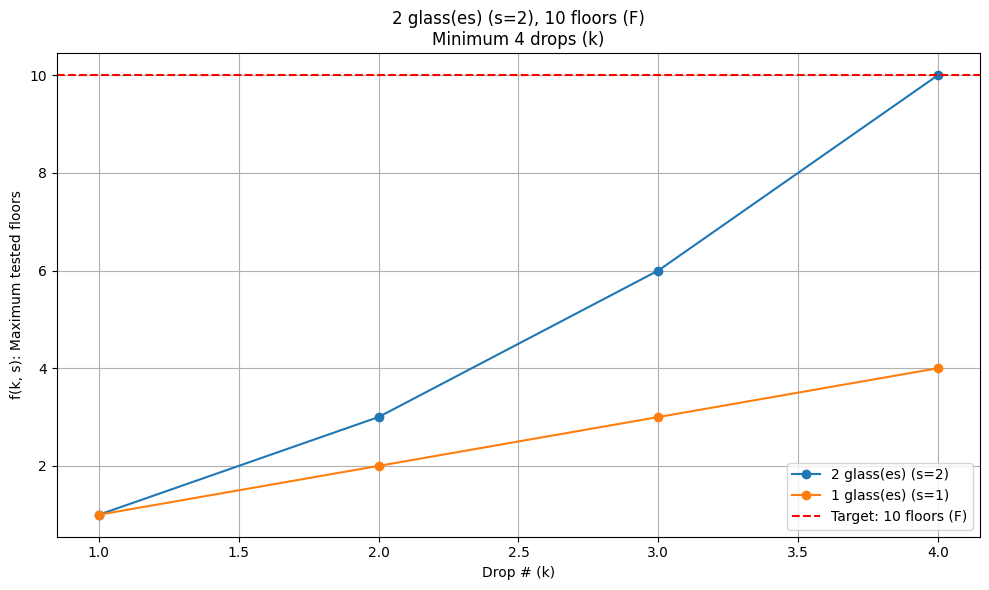


Input: Floors = 100, Glasses = 2

Minimum drops (k): 14

Dynamic programming table:


,2 glass(es) (s=2),1 glass(es) (s=1),0 glass(es) (s=0)
Drop # (k),,,
1,1,1,0
2,3,2,0
3,6,3,0
4,10,4,0
5,15,5,0
6,21,6,0
7,28,7,0
8,36,8,0
9,45,9,0


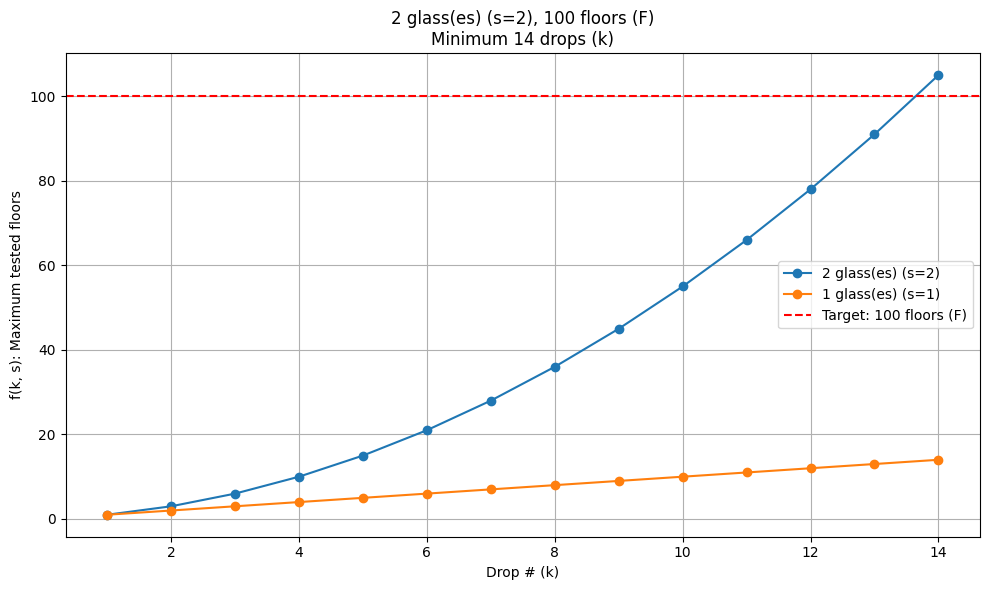


Input: Floors = 100, Glasses = 3

Minimum drops (k): 9

Dynamic programming table:


,3 glass(es) (s=3),2 glass(es) (s=2),1 glass(es) (s=1),0 glass(es) (s=0)
Drop # (k),,,,
1,1,1,1,0
2,3,3,2,0
3,7,6,3,0
4,14,10,4,0
5,25,15,5,0
6,41,21,6,0
7,63,28,7,0
8,92,36,8,0
9,129,45,9,0


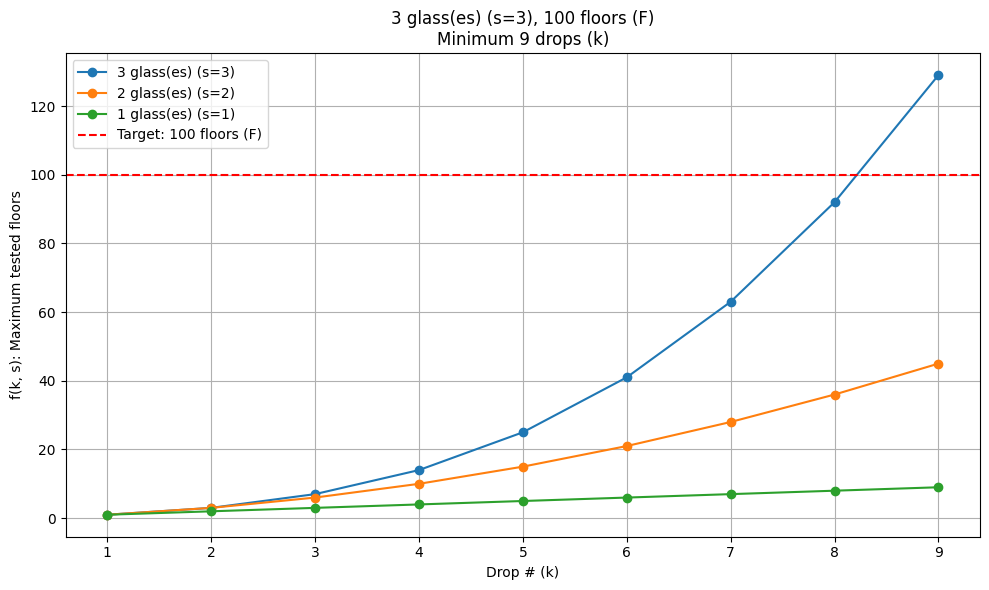


Input: Floors = 1000, Glasses = 2

Minimum drops (k): 45

Dynamic programming table:


,2 glass(es) (s=2),1 glass(es) (s=1),0 glass(es) (s=0)
Drop # (k),,,
1,1,1,0
2,3,2,0
3,6,3,0
4,10,4,0
5,15,5,0
6,21,6,0
7,28,7,0
8,36,8,0
9,45,9,0


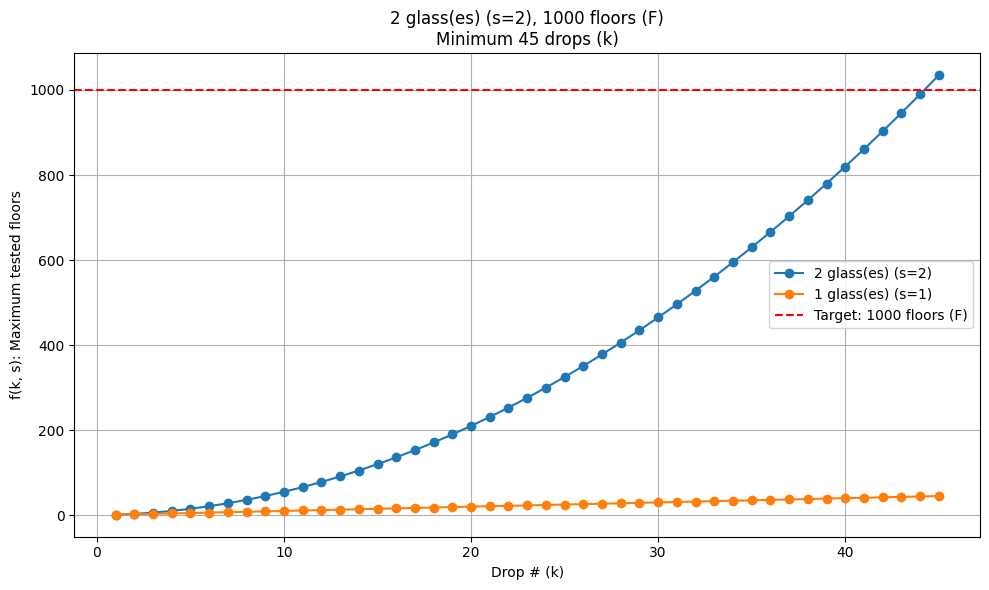


Input: Floors = 1000, Glasses = 3

Minimum drops (k): 19

Dynamic programming table:


,3 glass(es) (s=3),2 glass(es) (s=2),1 glass(es) (s=1),0 glass(es) (s=0)
Drop # (k),,,,
1,1,1,1,0
2,3,3,2,0
3,7,6,3,0
4,14,10,4,0
5,25,15,5,0
6,41,21,6,0
7,63,28,7,0
8,92,36,8,0
9,129,45,9,0


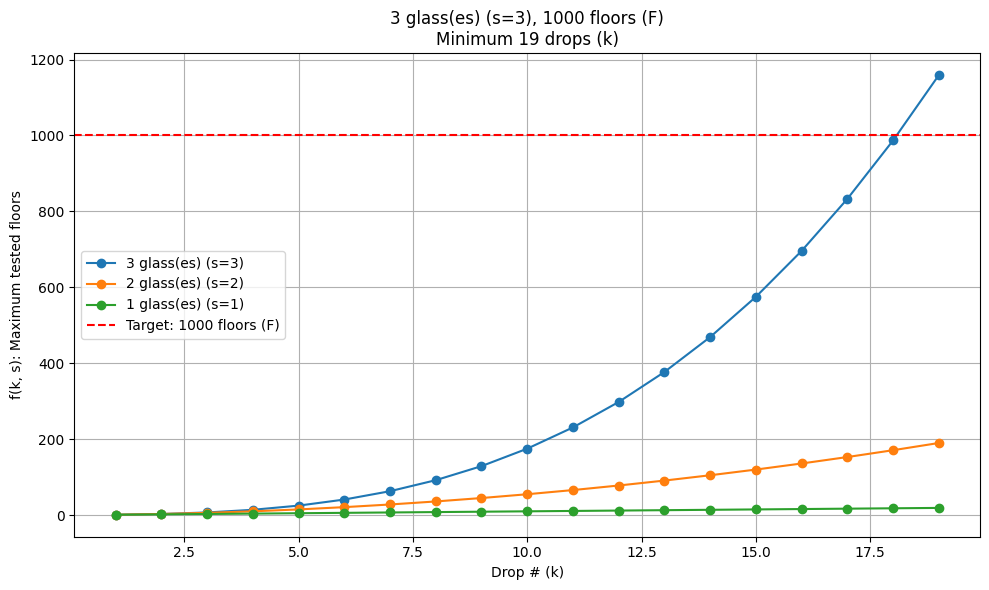

Non-digit input detected. Exiting program.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

def generate_dp_table(floors, glasses):
    """
    Calculate f(k, s): maximum number of floors that can be tested 
    using k drops and s glasses.
    """
    f = np.zeros(glasses + 1, dtype=int)  # f[s] = f(k, s)
    history = []
    drops = 0
    while f[glasses] < floors:
        drops += 1
        for s in range(glasses, 0, -1):
            f[s] = f[s] + f[s - 1] + 1  # f(k, s) = f(k-1, s-1) + f(k-1, s) + 1
        history.append(f.copy())

    # Table: floors to glasses
    columns = [f"{s} glass(es) (s={s})" for s in reversed(range(len(f)))]
    data = [row[::-1] for row in history]
    table = pd.DataFrame(data, columns=columns)
    table.index = np.arange(1, len(table) + 1)
    table.index.name = "Drop # (k)"
    return drops, table

def plot_dp_graph(table, floors, glasses, drops):
    plt.figure(figsize=(10, 6))
    for s in range(glasses, 0, -1):
        col = f"{s} glass(es) (s={s})"
        plt.plot(table.index, table[col], marker='o', label=col)

    plt.axhline(y=floors, color='red', linestyle='--', label=f"Target: {floors} floors (F)")
    plt.title(f"{glasses} glass(es) (s={glasses}), {floors} floors (F)\nMinimum {drops} drops (k)")
    plt.xlabel("Drop # (k)")
    plt.ylabel("f(k, s): Maximum tested floors")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# The cycle: if you enter non-digit input, the program exits.
while True:
    floors_input = input("\nEnter number of floors (F) (or any non-digit to exit): ")
    if not floors_input.isdigit():
        print("Non-digit input detected. Exiting program.")
        break
    floors = int(floors_input)
    
    glasses_input = input("Enter number of glasses (s) (or any non-digit to exit): ")
    if not glasses_input.isdigit():
        print("Non-digit input detected. Exiting program.")
        break
    glasses = int(glasses_input)

    if floors <= 0 or glasses <= 0:
        print("Please enter positive integers.")
        continue

    print(f"\nInput: Floors = {floors}, Glasses = {glasses}")
    drops, table = generate_dp_table(floors, glasses)
    print(f"\nMinimum drops (k): {drops}\n")
    print("Dynamic programming table:")
    display(table)

    plot_dp_graph(table, floors, glasses, drops)
